# Week 6 Lab 3 - CCDE_Filter - Sound Effects

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.sound.effects import *
from waves.tools.dsp import *

### Delta function

In [3]:
delta = np.zeros(N_SAMPLES)
delta[0] = 1

## Record wave sample

In [4]:
Fs = 44100

In [24]:
# Sound.record()

In [25]:
w = WaveFile(f = FILE_NAME)
ys_original = w.channels[0].ys

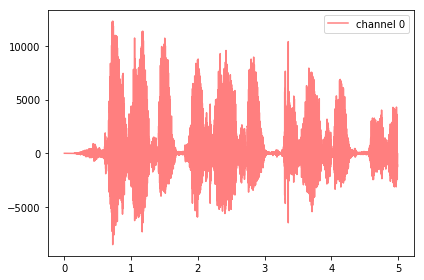

In [26]:
w.show(0)
plt.show()
# w.play()

## Simple Echo filter
$$ y[n] = \frac{ax[n] + bx[n-N] + cx[n-2N]}{a+b+c}$$

In [8]:
# class SimpleEcho(CCDE_Filter):
    
#     def __init__(self, a = 1, b = 0.75, c = 0.5, delay = 0.3):
#         N = int(Fs * delay)
#         cb = np.concatenate(([1], np.zeros(N), [b], np.zeros(N), [c]))
#         ca = [a + b + c]
#         super().__init__(b = cb, a = ca)

In [27]:
ccde = SimpleEcho(a = 1, b = 0.75, c = 0.5, delay = 0.3)
%time filtered = ccde.filter(ys_original)
ch = Channel(filtered, framerate = Fs)

Wall time: 6.03 s


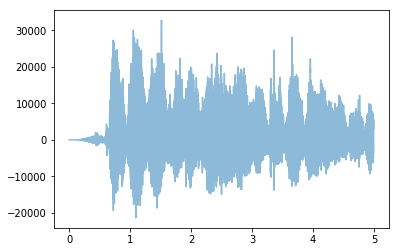

In [28]:
ch.show(0)
plt.show()
ch.play()

## Natural Echo filter
$$
\begin{align}
y[n] &=  x[n] - \lambda x[n-1] + \lambda y[n-1] + \alpha(1-\lambda)y[n-N]  \\
H(z) &= \frac{ 1 - \lambda z^{-1} }{1 -\lambda z^{-1} -\alpha(1-\lambda) z^{-N}} \\
b &= [1, -\lambda] \\
a &= [1, -\lambda, 0,0,...,0,0,-\alpha(1-\lambda)]  \\
\end{align}
$$

In [29]:
# class NaturalEcho(CCDE_Filter):
    
#     def __init__(self, lamda = 0.6, alpha = 0.7, delay = 0.3):
#         N = int(Fs * delay)
#         cb = [1, -lamda]
#         ca = np.concatenate(([1, -lamda], np.zeros(N), [-alpha *(1-lamda)]))
#         super().__init__(b = cb, a = ca)

In [30]:
ccde = NaturalEcho(lamda = 0.6, alpha = 0.7, delay = 0.3)
filtered = ccde.filter(ys_original)
ch = Channel(filtered, framerate = Fs)

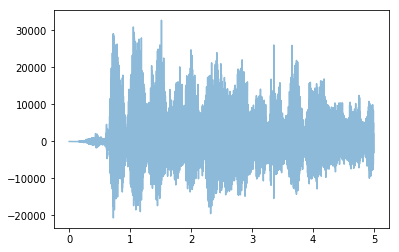

In [31]:
ch.show(0)
plt.show()
ch.play()

## Reverb
$$
\begin{align}
H(z) &= \frac{-\alpha + z^{-N }}{ 1-\alpha z^{-N}} \\
b &= [-\alpha,0,0,...,0,0,1] \\
a &= [1, 0,0,...,0,0,-\alpha ]  \\
\end{align}
$$

In [32]:
# class Reverb(CCDE_Filter):
    
#     def __init__(self, alpha = 0.8, delay = 0.3):
#         N = int(Fs * delay)
#         cb = np.concatenate(([-alpha], np.zeros(N), [1]))
#         ca = np.flip(cb)
#         super().__init__(b = cb, a = ca)

In [33]:
ccde = Reverb(alpha = 0.8, delay = 0.3)
filtered = ccde.filter(ys_original)
ch = Channel(filtered, framerate = Fs)

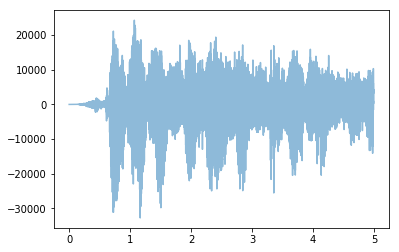

In [34]:
ch.show(0)
plt.show()
ch.play()

# Non-LTI filter

## Distortion
$$
\begin{align}
y[n] = trunc(a x[n])/a \\
\end{align}
$$

In [35]:
# class Distortion(CCDE_Filter):
    
#     def __init__(self, limit = 0.02, G = 5):
#         self.limit = limit
#         self.G = G

#         self._filter = np.frompyfunc(self.new_output, 1, 1)

#     def new_output(self, input_value):
#         return self.G * np.clip(input_value, -self.limit, self.limit) 

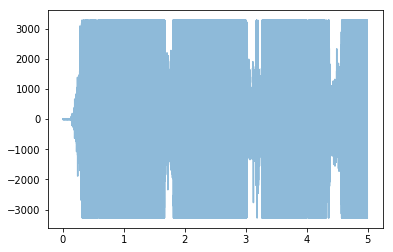

In [41]:
ccde = Distortion(limit = 0.02, G = 5) 
filtered = ccde.filter(thinkdsp.normalize(ys_original))
ch = Channel(filtered, framerate = Fs)

ch.show(0)
plt.show()
ch.play()

## Tremolo
$$
\begin{align}
y[n] = (1+cos(\omega_o n)/G)x[n] \\
\end{align}
$$

In [19]:
# class Tremolo(CCDE_Filter):
    
#     def __init__(self, freq = 5, G = 2, Fs = DEFAULT_FRAMERATE): 
#         self.omega = PI2 * freq / Fs
#         self.G = G
#         self.n = 0.0

#         self._filter = np.frompyfunc(self.new_output, 1, 1)

#     def new_output(self, input_value):
#         self.n += 1
#         return (1 + np.cos(self.omega * self.n) / self.G) * input_value

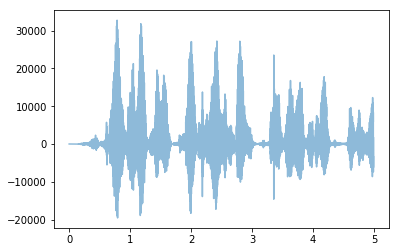

In [42]:
ccde = Tremolo(freq = 5, G = 2) 
filtered = ccde.filter(thinkdsp.normalize(ys_original))
ch = Channel(filtered, framerate = Fs)

ch.show(0)
plt.show()
ch.play()

## Flanger
$$
\begin{align}
y[n] = x[n] + x[n- \lfloor d(1+cos(\omega_o n)) \rfloor ] \\
\end{align}
$$

In [21]:
# class Flanger(CCDE_Filter): 
    
#     def __init__(self, freq = 0.1, max_delay = 0.002, Fs = DEFAULT_FRAMERATE): 
#         self.omega = PI2 * freq / Fs
#         self.d = max_delay * Fs 
#         self.n = 0.0
#         self.buffer_x = np.zeros(int(self.d * 2 + 1))

#         self._filter = np.frompyfunc(self.new_output, 1, 1)

#     def new_output(self, input_value):
#         self._new_input(input_value)
        
#         self.n += 1
#         idx = int(np.floor(self.d * (1 + np.cos(self.omega * self.n))))
#         return input_value + self.buffer_x[idx]

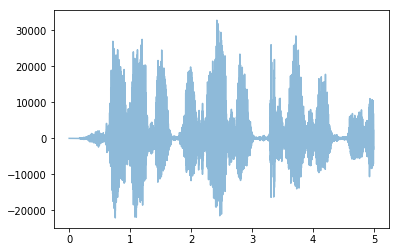

In [43]:
ccde = Flanger(freq = 0.2, max_delay = 0.02) 
filtered = ccde.filter(thinkdsp.normalize(ys_original))
ch = Channel(filtered, framerate = Fs)

ch.show(0)
plt.show()
ch.play()